In [785]:
import numpy as np
import pandas as pd
import re
import ast
import pdb
import copy

In [786]:
with open('input_e.txt') as fin:
    monkeys=fin.readlines()

In [787]:
monkeys

['Monkey 0:\n',
 '  Starting items: 79, 98\n',
 '  Operation: new = old * 19\n',
 '  Test: divisible by 23\n',
 '    If true: throw to monkey 2\n',
 '    If false: throw to monkey 3\n',
 '\n',
 'Monkey 1:\n',
 '  Starting items: 54, 65, 75, 74\n',
 '  Operation: new = old + 6\n',
 '  Test: divisible by 19\n',
 '    If true: throw to monkey 2\n',
 '    If false: throw to monkey 0\n',
 '\n',
 'Monkey 2:\n',
 '  Starting items: 79, 60, 97\n',
 '  Operation: new = old * old\n',
 '  Test: divisible by 13\n',
 '    If true: throw to monkey 1\n',
 '    If false: throw to monkey 3\n',
 '\n',
 'Monkey 3:\n',
 '  Starting items: 74\n',
 '  Operation: new = old + 3\n',
 '  Test: divisible by 17\n',
 '    If true: throw to monkey 0\n',
 '    If false: throw to monkey 1']

In [788]:
m_ind = re.findall('Monkey (\d+):', ' '.join(monkeys))
m_ind = [int(x) for x in m_ind]
starting_items = re.findall('Starting items: ([a-z, A-Z0-9_.-]*)', ' '.join(monkeys))
starting_items=[x.split(',') for x in starting_items]
#starting_items = [y.strip() for x in starting_items for y in x]
operation = re.findall('Operation: ([a-z, =+\*A-Z0-9_.-]*)', ' '.join(monkeys))
operation = [x.split(' = ')[1] for x in operation]
test = re.findall('Test: divisible by ([a-z, =+\*A-Z0-9_.-]*)', ' '.join(monkeys))
ifT = re.findall('If true: throw to monkey ([a-z, =+\*A-Z0-9_.-]*)', ' '.join(monkeys))
ifF = re.findall('If false: throw to monkey ([a-z, =+\*A-Z0-9_.-]*)', ' '.join(monkeys))


In [789]:
all_current_items = copy.deepcopy(starting_items)
inspection_track = [list() for x in range(0,len(m_ind))]

for r in range(0,20):
    for monkey in m_ind:
        current_items = all_current_items[int(monkey)].copy()
        for item in current_items:
            inspection_track[monkey].append(item)
            old = int(item)
            new = np.floor(eval(operation[monkey])/3)
            test_result = new % int(test[monkey]) == 0
            all_current_items[monkey].pop(0)
            if test_result:
                all_current_items[int(ifT[monkey])].append(new)
            else:
                all_current_items[int(ifF[monkey])].append(new)

In [790]:
inspect_sum=[len(x) for x in inspection_track]

In [791]:
inspect_sum

[101, 95, 7, 105]

In [792]:
inspect_sum = sorted(inspect_sum)

In [793]:
inspect_sum

[7, 95, 101, 105]

In [794]:
inspect_sum[-1] * inspect_sum[-2]

10605

In [795]:
pd.DataFrame(inspection_track)

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,79,98,20.0,23.0,27.0,26.0,695.0,10.0,71.0,135.0,...,116.0,44.0,25.0,94.0,16.0,54.0,NaN,NaN,NaN,NaN
1,54,65,75,74,2080.0,25.0,167.0,207.0,401.0,1046.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,79,60,97,57.0,38.0,38.0,38.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74,500.0,620.0,1200.0,3136.0,126.0,145.0,171.0,164.0,1083.0,...,76.0,88.0,107.0,215.0,734.0,278.0,158.0,595.0,101.0,342.0


## Part 2

In [796]:
class Item:
    def __init__(self, worry, item_index, current_monkey, current_round):
        self.worry = worry
        self.item_index = item_index
        self.monkey_list = [(current_round, current_monkey)]
        
    def pass_it(self, current_round, next_monkey):
        self.monkey_list.append((current_round, next_monkey))

In [797]:
all_current_items = copy.deepcopy(starting_items)
item_index = 0
all_current_its = [list() for x in m_ind]
for monkeyn, inv in enumerate(all_current_items):
    for it in inv:
        all_current_its[monkeyn].append(Item(int(it), item_index, monkeyn, 1))
        item_index += 1

In [798]:
operation

['old * 19', 'old + 6', 'old * old', 'old + 3']

In [799]:
worry_adj=[x.replace('*', '/').replace('old','new').replace('+', '/') for x in operation]

In [800]:
test

['23', '19', '13', '17']

In [801]:
worry_adj

['new / 19', 'new / 6', 'new / new', 'new / 3']

In [802]:
starting_items

[['79', ' 98'], ['54', ' 65', ' 75', ' 74'], ['79', ' 60', ' 97'], ['74']]

In [857]:
operation

['old * 19', 'old + 6', 'old * old', 'old + 3']

In [853]:
(3*19+6)/(19*3+6)

1.0476190476190477

In [841]:
4.415204678362573/0.2500384201629015

17.658105004367094

In [838]:
(79*19+3+6)/(19*3*6)

4.415204678362573

In [833]:
79*19+3+6*19+3+6/(19*3*6*19*3*6)

1621.0000512978352

In [865]:
mod_ops

['new % 19', 'new % 6', 'new % new', 'new % 3']

In [866]:
mod_ops=[x.replace('* 19','% 19').replace('+','%').replace('old','new') for x in operation]

In [867]:
mod_ops

['new % 19', 'new % 6', 'new * new', 'new % 3']

In [856]:
item

342.0

In [868]:
all_current_items = copy.deepcopy(starting_items)
item_index = 0
all_current_its = [list() for x in m_ind]
for monkeyn, inv in enumerate(all_current_items):
    for it in inv:
        all_current_its[monkeyn].append(Item(int(it), item_index, monkeyn, 1))
        item_index += 1
        
inspection_track = [list() for x in range(0,len(m_ind))]

for r in range(0,20):
    for monkey in m_ind:
        current_items = all_current_its[int(monkey)].copy()
        for item in current_items:
            inspection_track[monkey].append(item)
            old = item.worry
            new = eval(operation[monkey])
            item.worry = eval(mod_ops[monkey])
            test_result = new % int(test[monkey]) == 0
            all_current_its[monkey].pop(0)

            if test_result:
                item.pass_it(r+1, int(ifT[monkey]))
                all_current_its[int(ifT[monkey])].append(item)
                if monkey == 0:
                    item.worry = item.worry/23
            else:
                item.pass_it(r+1, int(ifF[monkey]))
                #item.worry = eval(worry_adj[monkey])
                all_current_its[int(ifF[monkey])].append(item)


In [869]:
inspect_sum=[len(x) for x in inspection_track]

In [870]:
inspect_sum

[96, 100, 91, 12]

In [784]:
item.worry

6.764786943506476e+52

In [709]:
for inv in all_current_its:
    for its in inv:
        cycle_sample = ''.join([str(y) for x,y in its.monkey_list])
        print(cycle_sample)
        for tlen in range(3,200):
            #cycle_obj=re.finditer(cycle_sample[:tlen], cycle_sample)
            cycle_obj=re.finditer('21', cycle_sample)
            pattern_starts = [m.start(0) for m in cycle_obj]
            pdb.set_trace()
            if len(pattern_starts) < 2:
                pdb.set_trace()
            pattern_length = pattern_starts[1]-pattern_starts[0]
            if all([x%tlen == 0 for x in pattern_starts]):
                its.cycle_length = tlen
                break
            else:
                continue
            print(pattern_length)


310310310310310310310310310310
> /scratch/tmp/22879487.1.default.q/ipykernel_7423/2146665496.py(10)<cell line: 1>()
      8             pattern_starts = [m.start(0) for m in cycle_obj]
      9             pdb.set_trace()
---> 10             if len(pattern_starts) < 2:
     11                 pdb.set_trace()
     12             pattern_length = pattern_starts[1]-pattern_starts[0]



ipdb>  exit


In [ ]:
inspect_sum=[len(x) for x in inspection_track]

In [ ]:
inspect_sum = sorted(inspect_sum)

In [ ]:
inspect_sum[-1] * inspect_sum[-2]

In [363]:
with open('input_x.txt') as fin:
    inspections=fin.readlines()

In [373]:
monk0 = re.findall('Monkey 0 inspected items (\d+)', ' '.join(inspections))
monk1 = re.findall('Monkey 1 inspected items (\d+)', ' '.join(inspections))
monk2 = re.findall('Monkey 2 inspected items (\d+)', ' '.join(inspections))
monk3 = re.findall('Monkey 3 inspected items (\d+)', ' '.join(inspections))

all_inspect = pd.DataFrame()

In [375]:
all_inspect['monkey0'] = monk0
all_inspect['monkey1'] = monk1
all_inspect['monkey2'] = monk2
all_inspect['monkey3'] = monk3

In [383]:
all_inspect['rd'] = rd

In [388]:
for col in all_inspect:
    all_inspect[col] = all_inspect[col].astype(int)

In [389]:
rd = [1,20,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]

In [390]:
import seaborn as sns

In [395]:
all_inspect

,monkey0,monkey1,monkey2,monkey3,rd
0,2,4,3,6,1
1,99,97,8,103,20
2,5204,4792,199,5192,1000
3,10419,9577,392,10391,2000
4,15638,14358,587,15593,3000
5,20858,19138,780,20797,4000
6,26075,23921,974,26000,5000
7,31294,28702,1165,31204,6000
8,36508,33488,1360,36400,7000
9,41728,38268,1553,41606,8000


In [406]:
for i in range(0,11):
    print(all_inspect['monkey0'].iloc[i]-all_inspect['monkey0'].iloc[i+1])

-97
-5105
-5215
-5219
-5220
-5217
-5219
-5214
-5220
-5217
-5221


In [399]:
all_inspect['monkey0'].iloc[-2]-all_inspect['monkey0'].iloc[-3]

5217

In [400]:
all_inspect['monkey0'].iloc[-3]-all_inspect['monkey0'].iloc[-4]

5220

In [401]:
all_inspect['monkey0'].iloc[-4]-all_inspect['monkey0'].iloc[-5]

5214

In [402]:
all_inspect['monkey0'].iloc[-5]-all_inspect['monkey0'].iloc[-6]

5219

In [403]:
all_inspect['monkey0'].iloc[-6]-all_inspect['monkey0'].iloc[-7]

5217

In [404]:
all_inspect['monkey0'].iloc[-7]-all_inspect['monkey0'].iloc[-8]

5220

In [405]:
all_inspect['monkey0'].iloc[-8]-all_inspect['monkey0'].iloc[-9]

5219

<AxesSubplot:ylabel='monkey0'>

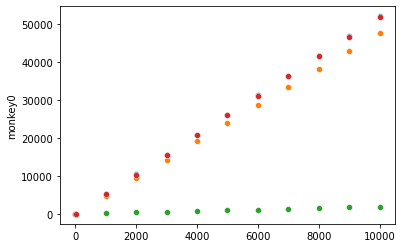

In [394]:
sns.scatterplot(data=all_inspect, x=rd,y='monkey0')
sns.scatterplot(data=all_inspect, x=rd,y='monkey1')
sns.scatterplot(data=all_inspect, x=rd,y='monkey2')
sns.scatterplot(data=all_inspect, x=rd,y='monkey3')